#### <left>Бронников Максим Андреевич</left>

*M8О-307Б, №4 по списку*

#   <center>Лабораторная работа №3</center>
### <center> Задание №5 </center>

**Вычислить определенный интеграл $ \displaystyle F = \int\limits_{x_0}^{x_k}ydx $ , методами прямоугольников, трапеций, Симпсона с шагами: а)$h_1$, б)$h_2$.** 

**Оценить погрешность вычислений, используя  Ме­тод Рунге-Ромберга.**

### <center> Вариант №4 </center>

$ y = \displaystyle\frac{3x + 4}{2x + 7} $

$ x_0 = -2, \; x_k = 2 $

а) $ h_1 = 1.0 $

б) $ h_2 = 0.5 $

## <center> Решение: </center>

### <center> Вспомогательные функции </center>

Импортируем бибилиотеки:

In [263]:
import matplotlib.pyplot as plt
import math
import sys
import numpy as np
from functools import reduce

Функция $ y = \displaystyle\frac{3x + 4}{2x + 7} $

In [264]:
def f_x(x):
    return (3*x + 4) / (2*x + 7)

Значение определенного интеграла $ \displaystyle F = \int\limits_{a}^{b}y(x) dx $ от функции $ y(x) $:

In [265]:
def F_x(a, b):
    return ((13*math.log(abs(2*a + 7)) - 6*a) - (13*math.log(abs(2*b + 7)) - 6*b)) / 4

Декоратор, вычисляющий погрешность интeгрирования функции $y = f(x)$ приближением $F_p$:

In [266]:
def epsilon(a, b, F):
    return abs(F_x(a, b) - F)

### <center> Формула прямоугольников </center>

В случае интегрирования с постоянным шагом формула приближенного вычисления $ F_p = h_j \displaystyle\sum\limits_{i = 0}^{k-1} y \left( \frac{2 x_i + h_j}{2} \right) $ реализуется функцией:

In [267]:
def rectangle_method(a, b, h, y):
    integ = 0.0
    x = a
    while x < b:
        integ += y(x + h / 2)
        x += h
    return h*integ

### <center> Формула трапеций </center>

В случае интегрирования с постоянным шагом формула приближенного вычисления $ F_j = h_j \left( \displaystyle\frac{y(x_0) + y(x_k)}{2} + \displaystyle\sum\limits_{i = 1}^{k-1} y(x_i) \right)$ реализуется:

In [268]:
def trapeze_method(a, b, h, y):
    integ = y(a) / 2
    x = a + h
    while x < b:
        integ += y(x)
        x += h
    return h*(integ + y(x) / 2)

### <center> Метод Симпсона </center>

В случае интегрирования с постоянным шагом формула приближенного вычисления $ F_j = \displaystyle\frac{h_j}{3} \displaystyle\sum\limits_{i = 1}^{k - 1} (y(x_{i-1}) + 4 y(x_i) + y(x_{i + 1})) $ реализуется:

In [269]:
def simpson_method(a, b, h, y):
    integ = 0.0
    x = a + h
    while x < b:
        integ += y(x - h) + 4*y(x) + y(x + h)
        x += h + h
    return h*integ/3

### <center> Метод Рунге-Ромберга-Ричардсона </center>

В случае приближённого интегрирования $F_1$ и $F_2$ с постоянными шагами $h_1$ и $h_2$ и порядком точности $p$, где $h_1 < h_2 $ формула приближенного вычисления порядка точности $p + 1 \;$ $ F_p = F_1 + \displaystyle\frac{F_1 - F_2}{\left(\displaystyle\frac{h_2}{h_1}\right)^p - 1} \; $ реализуется:

In [270]:
def runge_romberg_rich_method(h1, F1, h2, F2, p):
    if h1 < h2:
        return F1 + (F1 - F2) / ((h2 / h1)**p - 1)
    return F2 + (F2 - F1) / ((h1 / h2)**p - 1)

### <center> Демонстрация работы </center>

**а)** Начальные значения задаем в коде:

In [271]:
X0 = -2.0
X1 = 2.0
h1 = 1.0

Протестируем *метод прямоугольников*:

In [272]:
Fr1 = rectangle_method(X0, X1, h1, f_x)
print("Приближенное значение интеграла:", Fr1)

Приближенное значение интеграла: 1.8291666666666666


Протестируем *метод трапеций*:

In [273]:
Ft1 = trapeze_method(X0, X1, h1, f_x)
print("Приближенное значение интеграла:", Ft1)

Приближенное значение интеграла: 1.6704184704184706


Протестируем *метод Симпсона:*

In [274]:
Fs1 = simpson_method(X0, X1, h1, f_x)
print("Приближенное значение интеграла:", Fs1)

Приближенное значение интеграла: 1.7654641654641656


**б)** Начальные данные считаем из файла:

In [275]:
with open("data/d5.txt", "r") as file:
    X0 = float(file.readline())
    X1 = float(file.readline())
    h2 = float(file.readline())

*Метод прямоугольников:*

In [276]:
Fr2 = rectangle_method(X0, X1, h2, f_x)
print("Приближенное значение интеграла:", Fr2)

Приближенное значение интеграла: 1.7909819111057501


*Метод трапеций:*

In [277]:
Ft2 = trapeze_method(X0, X1, h2, f_x)
print("Приближенное значение интеграла:", Ft2)

Приближенное значение интеграла: 1.7497925685425686


*Метод Симпсона*

In [278]:
Fs2 = simpson_method(X0, X1, h2, f_x)
print("Приближенное значение интеграла:", Fs2)

Приближенное значение интеграла: 1.7762506012506012


Уточним полученные приближения *методом Рунге-Ромберга-Симпсона* для приближения с заданным параметром точности $p$:

*Методом прямоугольников:*

In [279]:
p = 2
Fp = runge_romberg_rich_method(h1, Fr1, h2, Fr2, p)
print("Значение метода:", Fp)
print("Погрешность метода:", epsilon(X0, X1, Fp))

Значение метода: 1.7782536592521112
Погрешность метода: 0.0009233576754594797


*Методом трапеций:*

In [280]:
p = 2
Fp = runge_romberg_rich_method(h1, Ft1, h2, Ft2, p)
print("Значение метода:", Fp)
print("Погрешность метода:", epsilon(X0, X1, Fp))

Значение метода: 1.7762506012506012
Погрешность метода: 0.0010797003260505367


*Методом Симпсона:*

In [281]:
p = 4
Fp = runge_romberg_rich_method(h1, Fs1, h2, Fs2, p)
print("Значение метода:", Fp)
print("Погрешность метода:", epsilon(X0, X1, Fp))

Значение метода: 1.7769696969696969
Погрешность метода: 0.00036060460695486185


### <center> Графическое отображение </center>

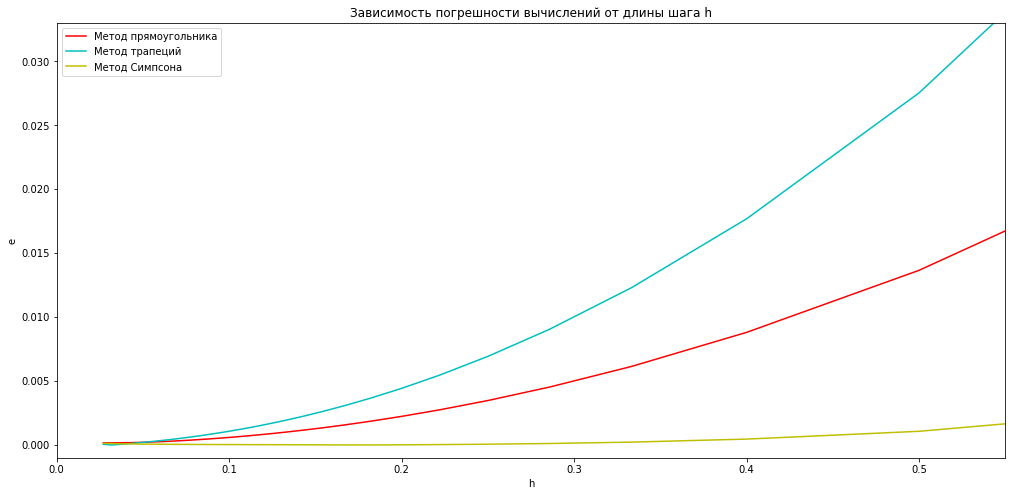

In [282]:
x = [(X1 - X0) / i + 0.000001 for i in range(6, 150, 2)]

y1 = list(map(lambda v: epsilon(X0, X1, rectangle_method(X0, X1, v, f_x)), x))
y2 = list(map(lambda v: epsilon(X0, X1, trapeze_method(X0, X1, v, f_x)), x))
y3 = list(map(lambda v: epsilon(X0, X1, simpson_method(X0, X1, v, f_x)), x))

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y1, 'r')
line2, = ax1.plot(x, y2, 'c')
line3, = ax1.plot(x, y3, 'y')

ax1.set_xlabel('h')
ax1.set_ylabel('e')


# set title, plot limits, etc
plt.title('Зависимость погрешности вычислений от длины шага h')
plt.xlim(0.0, 0.55)
plt.ylim(-0.001, 0.033)


# add a legend, and position it on the upper right
plt.legend((line1, line2, line3), ("Метод прямоугольника", "Метод трапеций", "Метод Симпсона"))

plt.show()

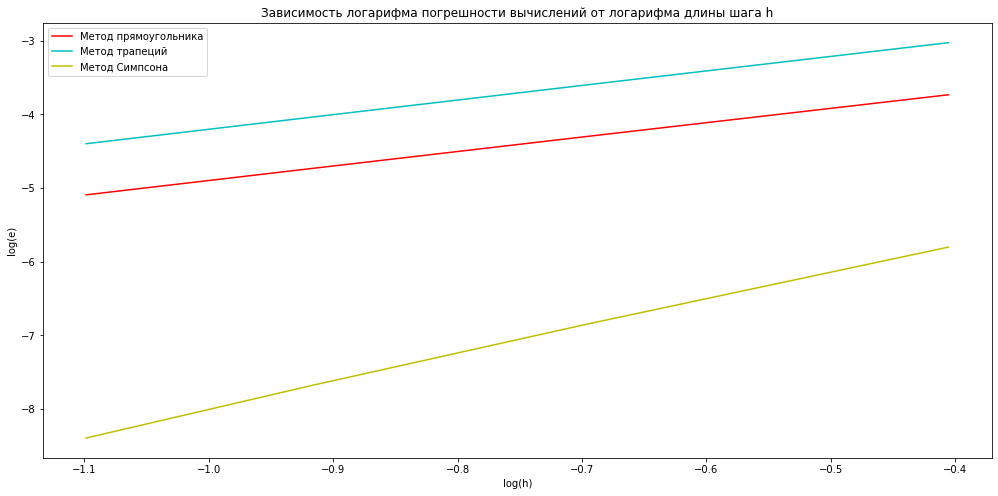

In [283]:
x = [(X1 - X0) / i + 0.000001 for i in range(6, 14, 2)]

xx = list(map(math.log, x))

y1 = list(map(lambda v: math.log(epsilon(X0, X1, rectangle_method(X0, X1, v, f_x))), x))
y2 = list(map(lambda v: math.log(epsilon(X0, X1, trapeze_method(X0, X1, v, f_x))), x))
y3 = list(map(lambda v: math.log(epsilon(X0, X1, simpson_method(X0, X1, v, f_x))), x))


fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(xx, y1, 'r')
line2, = ax1.plot(xx, y2, 'c')
line3, = ax1.plot(xx, y3, 'y')

ax1.set_xlabel('log(h)')
ax1.set_ylabel('log(e)')


# set title, plot limits, etc
plt.title('Зависимость логарифма погрешности вычислений от логарифма длины шага h')



# add a legend, and position it on the upper right
plt.legend((line1, line2, line3), ("Метод прямоугольника", "Метод трапеций", "Метод Симпсона"))

plt.show()

###### <center>Сделано Бронниковым Максимом</center>
###### <center>07.04.2020</center>